# Data Mining Week 6 Class Assignment
# Anne Tantan / 0706022310043
# Rayna Shera Chang / 0706022310022

# Load Dataset

In [ ]:
# Import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [ ]:
# Load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# Get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# Get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Data Preprocessing

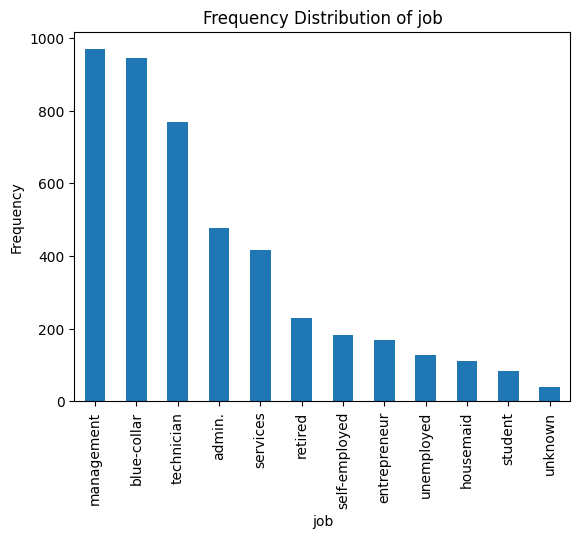

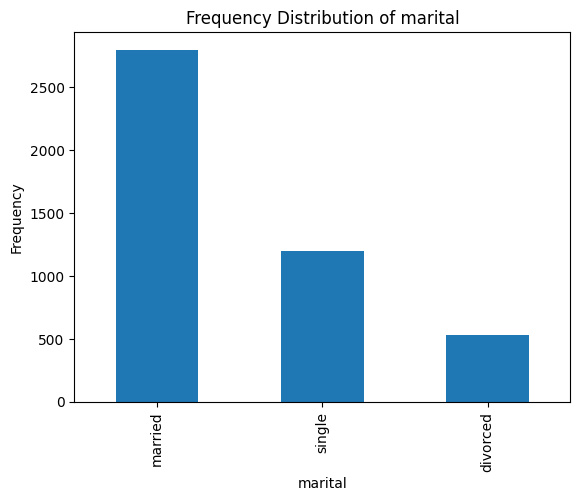

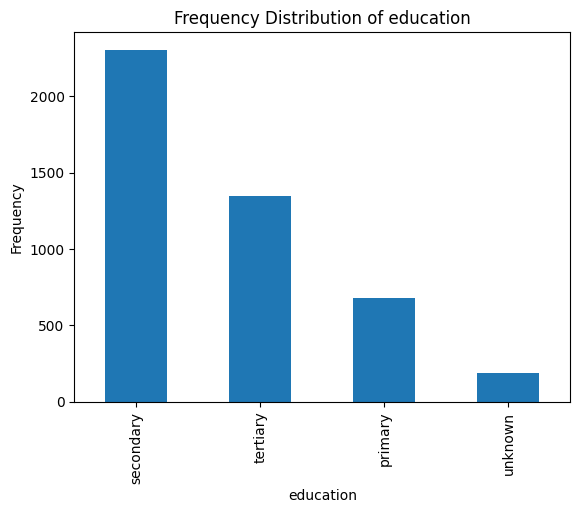

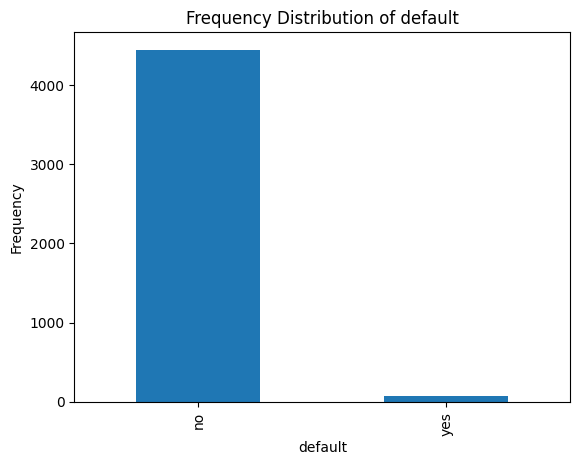

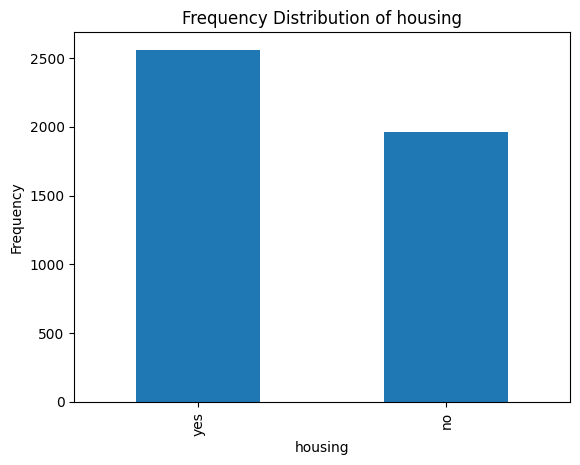

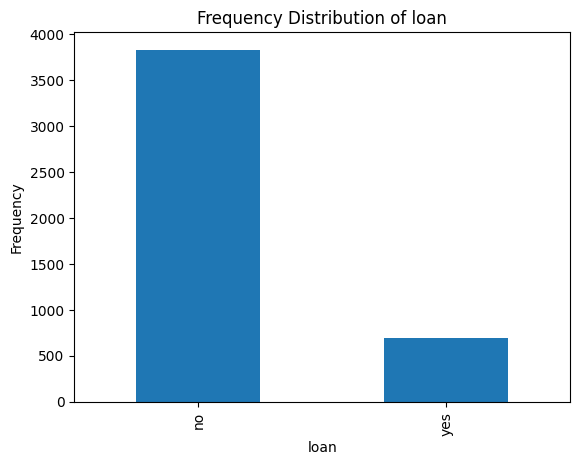

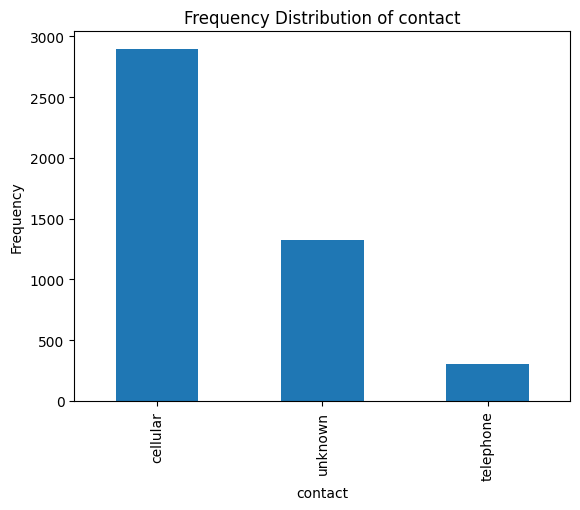

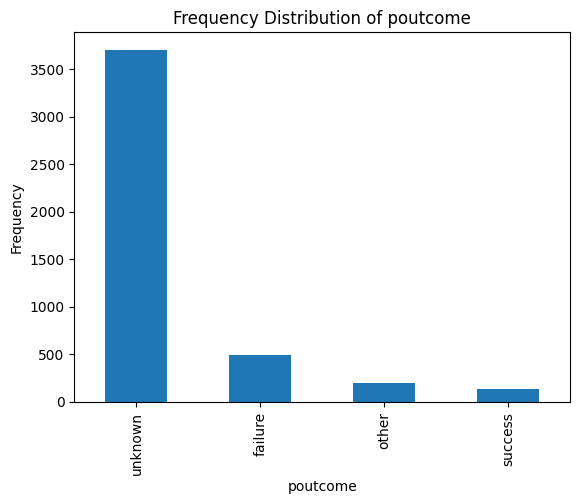

In [ ]:
col_names = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for col in col_names:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

In [ ]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'age':
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
--------------------
Unique values for column 'job':
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
--------------------
Unique values for column 'marital':
['married' 'single' 'divorced']
--------------------
Unique values for column 'education':
['primary' 'secondary' 'tertiary' 'unknown']
--------------------
Unique values for column 'default':
['no' 'yes']
--------------------
Unique values for column 'balance':
[ 1787  4789  1350 ...  -333 -3313  1137]
--------------------
Unique values for column 'housing':
['no' 'yes']
--------------------
Unique values for column 'loan':
['no' 'yes']
--------------------
Unique values for column 'contact':
['ce

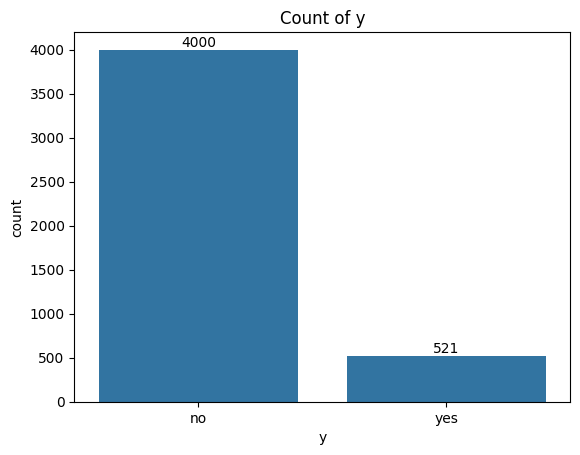

In [ ]:
# Show how many y (target)
ax = sns.countplot(data=df, x='y')
plt.title('Count of y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization

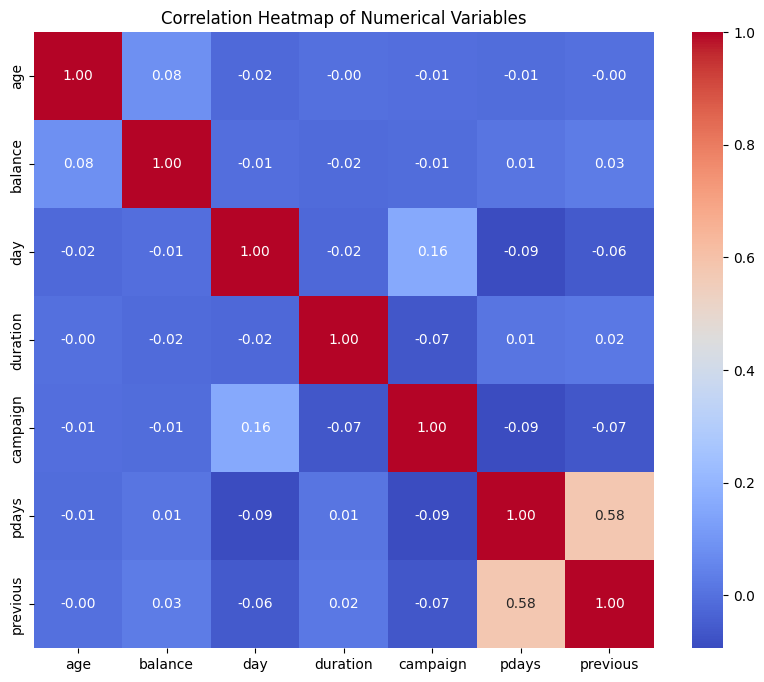

In [ ]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

The correlation heatmap shows that most numerical variables in the dataset have very weak linear relationships with one another, as most correlation values are close to zero. This indicates that the features are largely independent, which is beneficial for machine learning models since it reduces redundancy among predictors. The only moderately strong positive correlation appears between `pdays` (days since last contact) and `previous` (number of previous contacts), suggesting that customers who were contacted more often in previous campaigns tend to have smaller gaps since their last contact. Other variables such as `age`, `balance`, `duration`, and `campaign` show minimal correlation with each other, implying that they capture different aspects of customer information and campaign behavior.

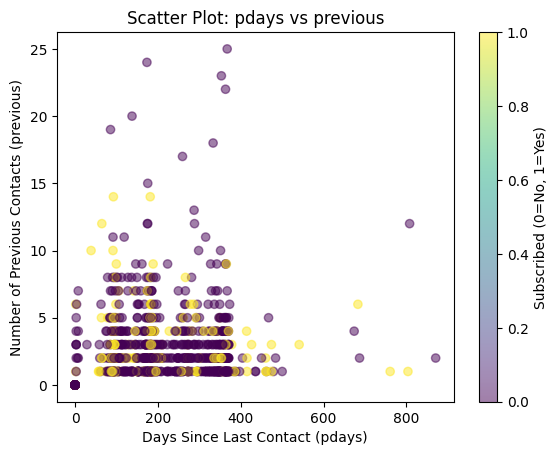

In [ ]:
# Scatter Plot: Relationship between Days Since Last Contact (pdays) and Number of Previous Contacts (previous)
import matplotlib.pyplot as plt

plt.scatter(df['pdays'], df['previous'],
            c=df['y'].astype('category').cat.codes, alpha=0.5)
plt.title("Scatter Plot: pdays vs previous")
plt.xlabel("Days Since Last Contact (pdays)")
plt.ylabel("Number of Previous Contacts (previous)")
plt.colorbar(label="Subscribed (0=No, 1=Yes)")
plt.show()

The scatter plot illustrates the relationship between days since last contact (`pdays`) and the number of previous contacts (`previous`), with color indicating whether a client subscribed to a term deposit (`y`). The plot shows a visible concentration of points near the lower left corner, meaning most clients had few or no previous contacts and were reached relatively recently. As `pdays` increases (indicating a longer time since last contact), the number of previous contacts generally remains low, suggesting that frequent recontacts are uncommon for clients not recently approached. Subscribed clients (lighter-colored points) are more concentrated toward lower `pdays` values and a slightly higher number of previous contacts, indicating that customers contacted more recently or multiple times are somewhat more likely to subscribe.

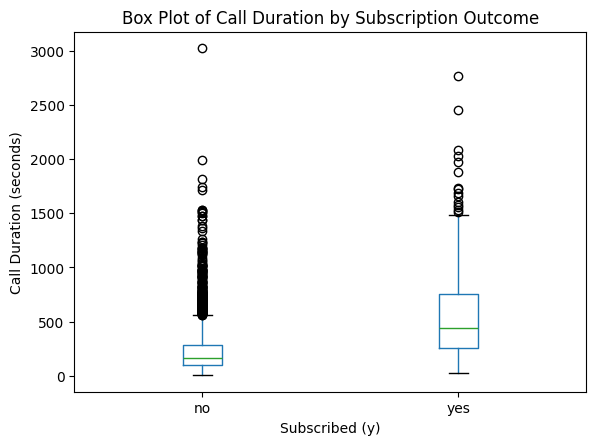

In [ ]:
# Box Plot : Duration vs Target
import matplotlib.pyplot as plt

df.boxplot(column='duration', by='y', grid=False)
plt.suptitle('')
plt.title("Box Plot of Call Duration by Subscription Outcome")
plt.xlabel("Subscribed (y)")
plt.ylabel("Call Duration (seconds)")
plt.show()

The box plot compares call duration between clients who did not subscribe (“no”) and those who did subscribe (“yes”) to a term deposit. It clearly shows that subscribed clients tend to have significantly longer call durations, with a higher median and wider range of values compared to non-subscribers. Many non-subscribers have short calls clustered near the lower end of the duration scale, while subscribers often have calls extending beyond 500 seconds, with some lasting several thousand seconds. This suggests that longer and more engaging conversations are strongly associated with successful subscriptions, implying that call duration could be a key predictive feature in determining customer conversion likelihood.

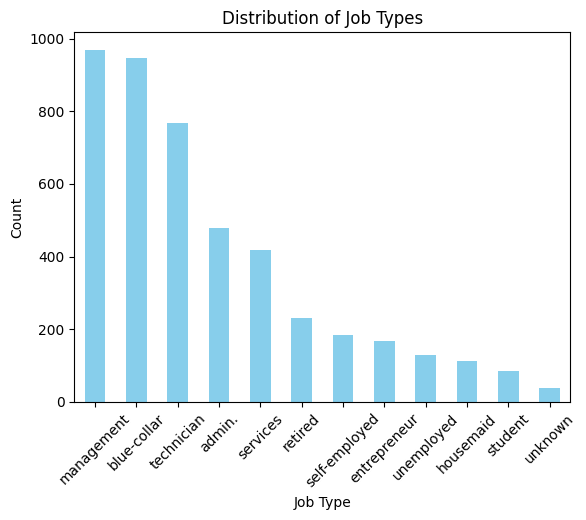

In [ ]:
# Bar Chart: Distribution of Job Types
df['job'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Job Types")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The bar chart shows the distribution of job types among the bank’s clients. The majority of clients work in management, blue-collar, and technician positions, which together make up the largest portion of the dataset. These are followed by admin and services, representing a moderate number of clients, while job categories such as self-employed, retired, entrepreneur, unemployed, housemaid, and student are less common. The “unknown” category has the fewest records, suggesting minimal missing data for this feature. This distribution indicates that the bank’s marketing campaigns mainly reach individuals in professional and technical occupations, reflecting a focus on working-age clients with stable employment backgrounds.


# Feature Encoding

In [ ]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime
one_hot_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1}
}


for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['marital', 'education', 'contact', 'poutcome', 'month', 'job']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])


# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}


# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'education': {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2545,43,4.0,2.0,1.0,0,-228,1,1,2.0,16,8.0,122,2,-1,0,3.0,0
2048,54,4.0,1.0,0.0,0,3859,0,1,0.0,20,9.0,104,3,-1,0,3.0,0
3209,50,7.0,1.0,1.0,0,60,0,1,0.0,27,1.0,151,8,-1,0,3.0,0
1951,46,2.0,2.0,2.0,0,1410,1,0,0.0,19,9.0,93,1,189,8,0.0,0
1287,31,4.0,1.0,2.0,0,2603,1,0,0.0,11,3.0,280,4,-1,0,3.0,1


In [ ]:
# Checking encode result
df.loc[872]

,872
age,33
job,technician
marital,single
education,secondary
default,no
balance,716
housing,yes
loan,no
contact,cellular
day,14


# Separate features and target

In [ ]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [ ]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,0.0,0,1787,0,0,0.0,19,10.0,79,1,-1,0,3.0
1,33,7.0,1.0,1.0,0,4789,1,1,0.0,11,8.0,220,1,339,4,0.0
2,35,4.0,2.0,2.0,0,1350,1,0,0.0,16,0.0,185,1,330,1,0.0
3,30,4.0,1.0,2.0,0,1476,1,1,2.0,3,6.0,199,4,-1,0,3.0
4,59,1.0,1.0,1.0,0,0,1,0,2.0,5,8.0,226,1,-1,0,3.0


In [ ]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4153,42,9.0,1.0,1.0,0,440,1,0,0.0,3,3.0,13,5,-1,0,3.0
2085,33,1.0,1.0,1.0,0,-77,1,0,0.0,28,5.0,151,3,-1,0,3.0
1891,32,4.0,2.0,2.0,0,656,1,1,0.0,20,0.0,148,2,-1,0,3.0
3611,28,9.0,2.0,1.0,0,389,1,0,0.0,11,8.0,15,7,-1,0,3.0
4015,36,9.0,1.0,1.0,0,5902,1,0,2.0,23,8.0,219,4,-1,0,3.0


In [ ]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2398,51,2.0,1.0,1.0,1,-2082,0,1,0.0,28,5.0,123,6,-1,0,3.0
800,50,4.0,1.0,2.0,0,2881,0,0,0.0,5,1.0,510,2,2,5,1.0
2288,50,9.0,1.0,1.0,0,1412,0,0,0.0,6,1.0,131,3,-1,0,3.0
2344,37,4.0,1.0,2.0,0,0,1,0,2.0,3,6.0,247,13,-1,0,3.0
3615,31,0.0,2.0,1.0,0,757,0,0,0.0,3,3.0,343,2,-1,0,3.0


# Oversampling

In [ ]:
# Using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# We should define the categorical features first to make oversampling more accurate
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'poutcome',
    'month'
]

# Oversampling/undersampling dilakukan setelah memilah dataset jadi X dan y
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# Dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 16), (2400, 16))

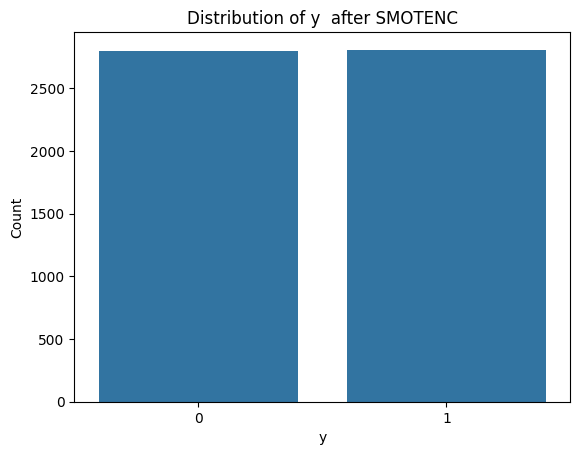

In [ ]:
# Visualize the distribution of target class after SMOTENC
sns.countplot(x=y_train)
plt.title('Distribution of y  after SMOTENC')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report Decision Tree (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Decision Tree (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Decision Tree (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report Decision Tree (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1206
           1       0.87      0.89      0.88      1194

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



## KFold Cross Validation

In [ ]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# Split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [ ]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.87623762 0.89330025 0.88372093 0.8691358  0.88671157]
Average score: 0.88


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 42}
Best cross-validation f1 score: 0.867


## Feature Importance

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[4.66344297e-02 2.91781835e-02 2.67486199e-02 1.99588404e-02
 1.69467785e-04 1.15600246e-01 2.22433224e-02 3.46256082e-02
 7.07653464e-02 3.94448729e-02 5.99842021e-02 3.56160811e-01
 2.23138773e-02 7.68569581e-02 7.57033847e-03 7.17448756e-02]


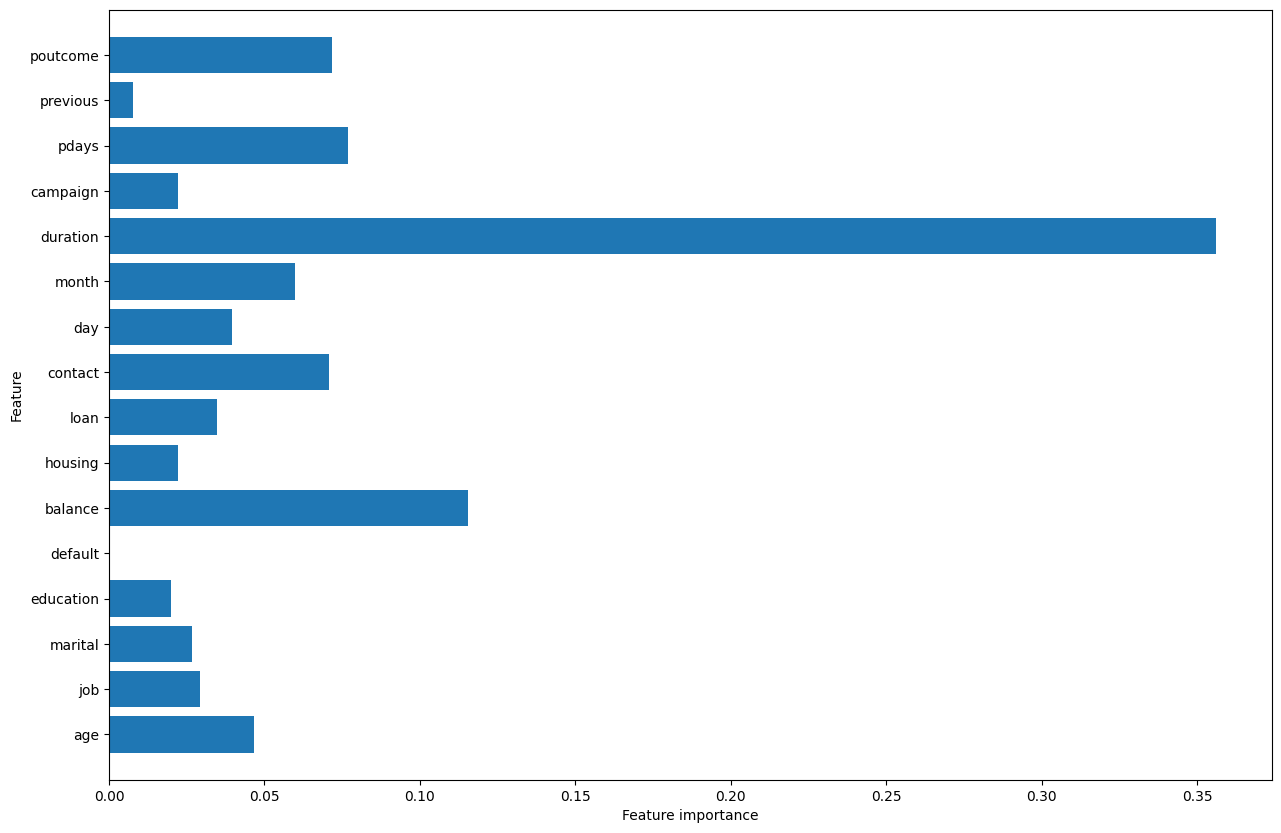

In [ ]:
# Visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [ ]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.356161
balance,0.115600
pdays,0.076857
poutcome,0.071745
contact,0.070765
month,0.059984


In [ ]:
# Using only important features for the prediction
important_features = ["duration", "balance", "contact",
    "poutcome", "pdays", "month"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y'] #target

In [ ]:
display(X_importance)
display(y_importance)

,duration,balance,contact,poutcome,pdays,month
0,79,1787,0.0,3.0,-1,10.0
1,220,4789,0.0,0.0,339,8.0
2,185,1350,0.0,0.0,330,0.0
3,199,1476,2.0,3.0,-1,6.0
4,226,0,2.0,3.0,-1,8.0
...,...,...,...,...,...,...
4516,329,-333,0.0,3.0,-1,5.0
4517,153,-3313,2.0,3.0,-1,8.0
4518,151,295,0.0,3.0,-1,1.0
4519,129,1137,0.0,1.0,211,3.0


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [ ]:
# Oversampling again
categorical_features = ["contact", "poutcome", "month"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 6), (2400, 6))

In [ ]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report Decision Tree After Feature Importance (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report Decision Tree After Feature Importance (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report Decision Tree After Feature Importance (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report Decision Tree After Feature Importance (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1206
           1       0.86      0.87      0.86      1194

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a Random Forest model with default parameters
model = RandomForestClassifier()


model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# Show classification report
print("\n=== Classification Report Before Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Before Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Before Tuning (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report Before Tuning (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1206
           1       0.88      0.93      0.90      1194

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



## Hyperparameter Tuning using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=20)


In [ ]:
rfmodel = RandomForestClassifier(
    n_estimators=200,
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred_train = rfmodel.predict(X_train)
y_pred_test  = rfmodel.predict(X_test)

# Show classification report
print("\n=== Classification Report Random Forest After Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Random Forest After Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Random Forest After Tuning (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report Random Forest After Tuning (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1206
           1       0.87      0.94      0.90      1194

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Create model with default parameter
gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_train = gb_model.predict(X_train)
y_pred_test  = gb_model.predict(X_test)

# Show classification report
print("\n=== Classification Report Gradient Boosting Before Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Gradient Boosting Before Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Gradient Boosting Before Tuning (Training Set) ===
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2794
           1       0.84      0.90      0.87      2806

    accuracy                           0.87      5600
   macro avg       0.87      0.87      0.87      5600
weighted avg       0.87      0.87      0.87      5600


=== Classification Report Gradient Boosting Before Tuning (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.83      0.85      1206
           1       0.84      0.89      0.86      1194

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400



## Hyperparameter Tuning using Grid Search


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gb_model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Best Model Accuracy: 0.8979166666666667


In [ ]:
gbc_clf = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=7,
    random_state=42
)

gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=50,
                           random_state=42)

In [ ]:
y_pred_train = gbc_clf.predict(X_train)
y_pred_test  = gbc_clf.predict(X_test)

# Show classification Report
print("\n=== Classification Report Gradient Boosting After Tuning (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report Gradient Boosting After Tuning (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report Gradient Boosting After Tuning (Training Set) ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2794
           1       0.98      0.99      0.98      2806

    accuracy                           0.98      5600
   macro avg       0.98      0.98      0.98      5600
weighted avg       0.98      0.98      0.98      5600


=== Classification Report Gradient Boosting After Tuning (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1206
           1       0.87      0.93      0.90      1194

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



# Model Evaluation

In [ ]:
import pandas as pd
results = [
    # Model, Train Accuracy, Train Precision, Train Recall, Train F1, Test Accuracy, Test Precision, Test Recall, Test F1
    ['Decision Tree', 1.00, 1.00, 1.00, 1.00, 0.88, 0.88, 0.88, 0.88],
    ['Random Forest', 1.00, 1.00, 1.00, 1.00, 0.90, 0.90, 0.90, 0.90],
    ['Gradient Boosting', 0.98, 0.98, 0.98, 0.98, 0.90, 0.90, 0.90, 0.90]
]

# Buat dataframe
columns = [
    'Model',
    'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1',
    'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1'
]
df_results = pd.DataFrame(results, columns=columns)

# Tampilkan tabel
print("\n=== Model Evaluation Comparison ===")
print(df_results.round(3))



=== Model Evaluation Comparison ===
               Model  Train Accuracy  Train Precision  Train Recall  Train F1  \
0      Decision Tree            1.00             1.00          1.00      1.00   
1      Random Forest            1.00             1.00          1.00      1.00   
2  Gradient Boosting            0.98             0.98          0.98      0.98   

   Test Accuracy  Test Precision  Test Recall  Test F1  
0           0.88            0.88         0.88     0.88  
1           0.90            0.90         0.90     0.90  
2           0.90            0.90         0.90     0.90  


In this model evaluation, the values used for Accuracy, Precision, Recall, and F1-score are taken from the weighted average (weighted avg) section of the classification report. The weighted average is chosen because it provides a balanced overall performance metric that accounts for class imbalance in the dataset.

In this case, the dataset has an unequal number of samples between the two target classes (subscribed = yes, not subscribed = no). If we used the macro average, each class would contribute equally to the final score regardless of its size, which could misrepresent the model’s actual performance. The weighted average, on the other hand, calculates the metric for each class and then weights it by the number of samples (support) in that class, giving a more realistic overall evaluation.

Therefore, using the weighted average metrics ensures that the evaluation reflects how well the model performs across all data points, not just on the minority or majority class.


**Model Evaluation Interpretation**

Based on the model evaluation comparison table, all three models (Decision Tree, Random Forest, and Gradient Boosting) performed well but with clear differences in their generalization abilities. The Decision Tree model achieved perfect scores (1.00) for accuracy, precision, recall, and F1-score on the training data, indicating that it completely memorized the training set. However, its performance dropped to 0.88 across all metrics on the test data, showing signs of overfitting, where the model fits the training data too closely and loses accuracy on unseen data. The Random Forest model also scored perfectly (1.00) on the training set but maintained slightly better generalization with 0.90 for accuracy, precision, recall, and F1-score on the test set, suggesting improved robustness due to ensemble averaging that reduces overfitting. The Gradient Boosting model achieved slightly lower training metrics (around 0.98) but matched Random Forest’s test performance at 0.90 across all metrics. This indicates that Gradient Boosting generalizes better by balancing bias and variance more effectively. Overall, while Random Forest and Gradient Boosting both outperform the single Decision Tree, Gradient Boosting provides the most balanced and stable performance, maintaining high accuracy and precision while avoiding overfitting.

# Discussion and Insights

## Which model performed best overall?

Overall, after hyperparameter tuning, both Random Forest and Gradient Boosting demonstrated excellent performance, each achieving an accuracy, precision, recall, and F1-score of 0.90 on the test set. This indicates that the tuning process effectively optimized the models to achieve high predictive accuracy on unseen data. However, a deeper look at the training results reveals some key differences between the two ensemble methods. The Random Forest model achieved a perfect score of 1.00 across all metrics on the training data, while Gradient Boosting obtained slightly lower training results of around 0.98.

This difference is significant because a perfect training performance, as seen in Random Forest, often suggests overfitting, where the model learns the training data too precisely and fails to generalize well to new, unseen samples. In contrast, Gradient Boosting’s slightly lower training performance indicates that it maintains a better balance between bias and variance, allowing it to generalize more effectively. The fact that both models perform equally well on the test set, while Gradient Boosting avoids complete memorization of the training data, highlights its superior ability to capture complex patterns without overfitting.

The improvement observed after hyperparameter optimization also demonstrates how tuning key parameters, such as the learning rate, maximum depth, and number of estimators, can significantly enhance model performance and stability, particularly for ensemble methods like Gradient Boosting.

## Did ensemble methods (RF, XGBoost) improve performance compared to a single Decision Tree?

Yes, the ensemble methods — Random Forest and Gradient Boosting clearly improved performance compared to a single Decision Tree. The Decision Tree model achieved an accuracy, precision, recall, and F1-score of 0.88 on the test set, while both ensemble methods reached 0.90 across all evaluation metrics after tuning. Although the numerical difference may seem small, the improvement represents a meaningful gain in predictive stability and generalization.

The key reason behind this improvement lies in the fundamental design of ensemble learning. A single Decision Tree tends to be high-variance and prone to overfitting, as it fully memorizes training data patterns, resulting in lower generalization on unseen data. In contrast, ensemble methods combine the predictive power of multiple trees to achieve better balance between bias and variance. Specifically, Random Forest uses bagging (bootstrap aggregation), where many independent trees are trained on random subsets of the data and features. This averaging process reduces variance and prevents the model from overfitting to noise in the dataset.

On the other hand, Gradient Boosting uses a boosting approach, building trees sequentially where each new tree corrects the errors of the previous ones. This allows the model to focus on difficult-to-predict samples and gradually improve its overall accuracy. Unlike the Decision Tree, which captures patterns in one pass, Gradient Boosting refines its understanding of the data step-by-step, resulting in a more accurate and robust predictive model.

In summary, the ensemble models significantly enhanced performance and reliability. Random Forest provided higher stability and reduced overfitting through parallel tree averaging, while Gradient Boosting achieved even stronger generalization by learning from errors iteratively. These improvements confirm that ensemble methods are more powerful and effective than a single Decision Tree, especially when applied to complex datasets like the bank marketing data.

## How could the bank use these insights to refine its marketing strategy?

Based on the analysis of the Bank Marketing dataset and the visualizations, several insights can guide the bank in refining its marketing strategy. The distribution of job types shows that most customers work in management, blue-collar, and technical fields. This suggests that the bank should focus its marketing campaigns on these dominant segments by tailoring messages to their specific financial needs and motivations. For example, highlighting long-term investment benefits for management roles and secure savings plans for blue-collar workers.

The box plot of call duration by subscription outcome reveals that customers who eventually subscribed to the term deposit typically had longer phone conversations. This indicates that effective, engaging communication is key to conversion. The bank should therefore emphasize call quality over quantity by training its agents to build rapport, listen actively, and provide detailed explanations rather than rushing calls.

The scatter plot between the number of previous contacts and the number of days since the last contact shows that customers who were contacted more than once, especially recently, are more likely to subscribe. However, when there’s a long gap since the last contact, the likelihood of subscription decreases. This insight suggests that the bank should adopt a structured follow-up strategy, focusing on customers who have shown interest before, while avoiding excessive delays between contacts.

Overall, the bank can improve its marketing outcomes by targeting key job segments, investing in higher-quality and longer interactions, and implementing a data-driven approach to timing and follow-ups. By combining these strategies with predictive modeling, particularly using Random Forest and Gradient Boosting, which demonstrated the best performance, the bank can more accurately identify customers with the highest likelihood of subscription, optimize its marketing efforts, and allocate resources more effectively.